In [1]:
import numpy as np
import sklearn

In [2]:
names = ["Mike","Max","Jörg","Simon","Jana","Felix","Markus"]

In [3]:
np.random.shuffle(names)
print(names)

['Jana', 'Markus', 'Jörg', 'Mike', 'Simon', 'Felix', 'Max']


In [4]:
import pandas as pd

In [5]:
data = pd.read_csv("../14_trees/train.tsv", sep = "\t").dropna()

In [6]:
data


,species,latitude,longitude,stem_diameter_cm,height_m,crown_radius_m
0,Fagus sylvatica,46.01,11.44,5.0,6.7,2.05
1,Fagus sylvatica,46.03,11.44,5.0,11.1,2.90
2,Fagus sylvatica,46.03,11.44,5.0,14.2,4.00
3,Fagus sylvatica,46.03,11.44,5.0,5.7,2.10
4,Fagus sylvatica,46.03,11.44,5.0,8.0,4.15
...,...,...,...,...,...,...
35094,Fagus sylvatica,47.38,9.09,36.0,22.6,4.50
35095,Fagus sylvatica,46.74,6.85,37.0,34.3,4.50
35096,Fagus sylvatica,47.45,9.29,38.0,33.8,5.00
35097,Fagus sylvatica,46.52,6.35,40.0,29.3,6.00


In [7]:
y = pd.read_csv("../14_trees/train.tsv", sep = "\t")


In [8]:
y = data["species"]

In [9]:
print(y)

0        Fagus sylvatica
1        Fagus sylvatica
2        Fagus sylvatica
3        Fagus sylvatica
4        Fagus sylvatica
              ...       
35094    Fagus sylvatica
35095    Fagus sylvatica
35096    Fagus sylvatica
35097    Fagus sylvatica
35098    Fagus sylvatica
Name: species, Length: 31311, dtype: object


In [10]:
X = data[["latitude", "longitude", "stem_diameter_cm", "height_m", "crown_radius_m"]]
X

,latitude,longitude,stem_diameter_cm,height_m,crown_radius_m
0,46.01,11.44,5.0,6.7,2.05
1,46.03,11.44,5.0,11.1,2.90
2,46.03,11.44,5.0,14.2,4.00
3,46.03,11.44,5.0,5.7,2.10
4,46.03,11.44,5.0,8.0,4.15
...,...,...,...,...,...
35094,47.38,9.09,36.0,22.6,4.50
35095,46.74,6.85,37.0,34.3,4.50
35096,47.45,9.29,38.0,33.8,5.00
35097,46.52,6.35,40.0,29.3,6.00


In [11]:
X = X.to_numpy()

In [12]:
y = y.to_numpy()

In [13]:
np.unique(y, return_counts = True)

(array(['Fagus sylvatica', 'Pinus pinaster', 'Quercus ilex'], dtype=object),
 array([ 5194,  9417, 16700]))

In [14]:
test = pd.read_csv("../14_trees/test.tsv", sep = "\t")

In [15]:
def majority_prediction(X, y, test):
    u = np.unique(y, return_counts = True)
    majority = u[0][u[1].argmax()]
    prediction = pd.DataFrame()
    prediction["tree_id"] = test.tree_id
    prediction["species"] = majority
    return prediction

In [16]:
majority_prediction(X, y, test).to_csv("tree_pred.tsv", sep='\t', index=False)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=8)
neigh.fit(X, y)

KNeighborsClassifier(n_neighbors=8)

In [18]:
print(neigh.predict(X))


['Quercus ilex' 'Fagus sylvatica' 'Fagus sylvatica' ... 'Fagus sylvatica'
 'Fagus sylvatica' 'Fagus sylvatica']


In [19]:
neigh.score(X, y)

0.9363482482194756

In [20]:
test

,tree_id,latitude,longitude,stem_diameter_cm,height_m,crown_radius_m
0,T_75102,46.01,11.44,5.0,14.2,3.10
1,T_75103,46.01,11.44,5.0,5.4,1.80
2,T_75118,46.03,11.43,5.0,4.9,1.75
3,T_75152,46.05,10.99,5.0,6.5,1.55
4,T_75161,46.05,10.99,5.0,4.9,1.90
...,...,...,...,...,...,...
8892,T_497140,46.24,7.26,21.0,2.6,3.00
8893,T_497324,47.39,7.36,32.0,21.6,4.00
8894,T_497361,46.09,8.99,36.0,3.0,3.50
8895,T_497401,46.74,6.96,37.0,32.3,4.50


In [21]:
test_pd = test[["latitude", "longitude", "stem_diameter_cm", "height_m", "crown_radius_m"]].dropna()

In [22]:
prediction = pd.DataFrame()
prediction["tree_id"] = test.dropna().tree_id
prediction["species"] = neigh.predict(test_pd)

/home/markus/miniconda3/envs/jupyter/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [23]:
prediction.to_csv("species_pred_knn8.tsv",sep='\t', index=False)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_val, y_train, y_val = train_test_split(X, y)

In [26]:
X_train.shape, X_val.shape

((23483, 5), (7828, 5))

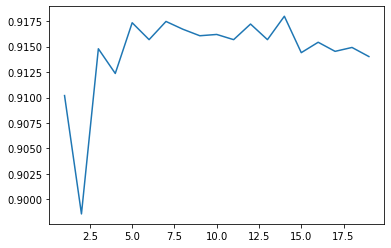

In [27]:
scores = []
for k in range(1, 20):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    scores.append(neigh.score(X_val, y_val))
    
import matplotlib.pyplot as plt
plt.plot(list(range(1,len(scores)+1)), scores)